# Load Modules & Data

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [9]:
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [10]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [12]:
## Useful constants
cat_vars = ["OperatingSystems", "Browser", "Region", 
            "TrafficType", "VisitorType", "Weekend", "Month"]
num_vars = list(set(df.columns) - set(cat_vars + ["Revenue"]))

# Cleaning and EDA

##  Type Conversion

In [13]:
####  Type conversion
convert_types = ["OperatingSystems", "Browser", "Region", "TrafficType",
                "VisitorType", "Month"]
df[convert_types] = df[convert_types].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null category
OperatingSystems           12330 non-null category
Browser                    12330 non-null category
Region                     12330 non-null category
TrafficType                12330 non-null category
VisitorType                12330 non-null category
Weekend                    12330 non-null bool
Revenue                    12330 non-null bo

##  Split data into 70% train, 30% test

In [15]:
####  Split train and test set
df_trn, df_tst = train_test_split(df, test_size=0.3, random_state=123)

print(df_trn.shape)
print(df_tst.shape)

(8631, 18)
(3699, 18)


##  EDA & Visualize (with Train Data)

### Missing values

In [16]:
print(df_trn.isnull().sum())
print(df_tst.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
W

#### No explicitly coded missing values in training or test data

### Look for structures in data (PCA on numerical features)

In [17]:
pca = PCA()
pca.fit(df_trn[num_vars])
print(pca.n_components_)

10


In [18]:
trn_pca = pca.transform(df_trn[num_vars])
print(trn_pca.shape)

(8631, 10)


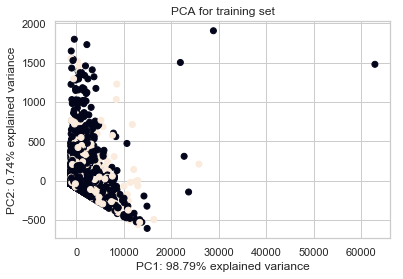

In [19]:
plt.scatter(trn_pca[:,0], trn_pca[:,1], c=df_trn.Revenue)
plt.title('PCA for training set')
plt.xlabel('PC1: ' + str(round(pca.explained_variance_ratio_[0]*100,2)) + '% explained variance')
plt.ylabel('PC2: ' + str(round(pca.explained_variance_ratio_[1]*100,2)) + '% explained variance')
plt.show()

There may be outliers?

In [20]:
df_trn.shape

(8631, 18)

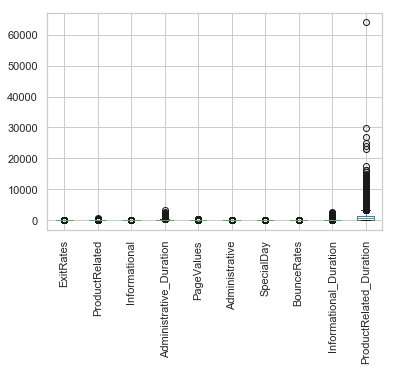

In [21]:
df_trn[num_vars].plot(kind="box")
plt.xticks(rotation=90)
plt.show()

In [22]:
df_trn.index[trn_pca[:,0] > 20000]

Int64Index([6165, 7662, 8308, 8071, 9238, 8784], dtype='int64')

In [23]:
df_trn[df_trn.ProductRelated_Duration >= 20000]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6165,10,2407.423810,3,434.300000,486,23050.10414,0.000324,0.011249,0.000000,0.0,Jul,2,2,1,3,Returning_Visitor,False,False
7662,10,1251.200000,7,250.000000,414,23888.81000,0.009900,0.027062,1.033757,0.0,Sep,2,2,4,13,Returning_Visitor,False,False
8308,27,853.735949,2,126.500000,584,24844.15620,0.002099,0.009347,4.511100,0.0,Nov,2,4,3,8,Returning_Visitor,False,False
8071,5,3398.750000,6,2549.375000,449,63973.52223,0.000764,0.027701,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
9238,15,2657.318056,13,1949.166667,343,29970.46597,0.005316,0.028971,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
8784,20,1307.675000,3,132.666667,517,27009.85943,0.004385,0.014594,8.403164,0.0,Nov,1,1,1,2,Returning_Visitor,False,True


Entry 8071 may have errorous information on product related duration

In [24]:
df_trn.drop(df_trn.index[trn_pca[:,0] > 20000], inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
df_trn.shape

(8625, 18)

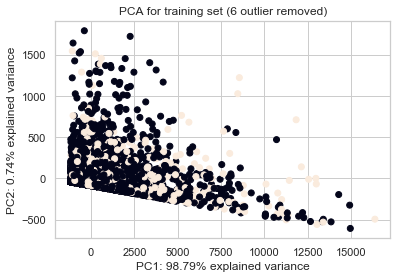

In [26]:
trn_pca_new = pca.transform(df_trn[num_vars])
plt.scatter(trn_pca_new[:,0], trn_pca_new[:,1], c=df_trn.Revenue)
plt.title('PCA for training set (6 outlier removed)')
plt.xlabel('PC1: ' + str(round(pca.explained_variance_ratio_[0]*100,2)) + '% explained variance')
plt.ylabel('PC2: ' + str(round(pca.explained_variance_ratio_[1]*100,2)) + '% explained variance')
plt.show()

### [Numeric, integer] Number of pages visited: Administrative, Informational, ProductRelated

In [27]:
page_count_cols = ["Administrative","Informational","ProductRelated"]
print(df_trn.Administrative.unique())
print(df_trn.Informational.unique())
print(df_trn.ProductRelated.unique())

[ 5  1  0 11  6  3  4 10  2 12  9  7  8 16 19 15 13 17 14 23 18 24 21 26
 22]
[ 1  0  2  4  3  7  6  5  9 10  8 16 12 11 14]
[ 77  37   9   1  64  49   7 133  25 224  10  40   8  27  31   5  72  53
   0  34  30  23  46 222   2 106  18  13  28  21  29  22   3  11  20   6
  39  15  42  79  38  35   4 152  36  89  33  16  17 104  26  63  19  96
  50 162  69  88 108  45  14  95  61  12  62  97 136  78  87  56 237  76
  41 137  90  44 221  85  93  83  48  24  68 109  32  47  60  54  66 385
  59  51 115  71  65 105 146 163  70 111  57 161  84  58 135  43  55  86
 126 128 159 151 113 101 117 324  82  94 131 336 124  74  81 145  67  52
 238 358 189 100 210  98 102 195  91 155 167 251 103 357 213 171 217 141
 154 231 275 107 180 121 130 378  75 118 125 129 401 156 202 219 216 114
 174 230 112 157  80  73 199 122 173 262 120 144 200 260  92  99 232 190
 204 164 181 116 197 176 170 186 198 127 286 140 175 134 220 110 256 218
 318 340 153 149 280 160 138 261 191 178 150 143 337 255 359 338 123 429

In [28]:
page_count_cols = ["Administrative","Informational","ProductRelated"]
df_trn[page_count_cols].apply(lambda x: (x.min(), x.max()))

Administrative     (0, 26)
Informational      (0, 16)
ProductRelated    (0, 518)
dtype: object

In [29]:
def create_plots(y_name, data, plt_type, log=False):
    y = data[y_name]
    if plt_type == 'violin':
        if log:
            sns.violinplot(y=y.apply(lambda x: math.log(x+1)), x="Revenue", data=data)
        else:
            sns.violinplot(y=y, x="Revenue", data=data)
    elif plt_type == 'boxplot':
        if log:
            sns.boxplot(y=y.apply(lambda x: math.log(x+1)), x="Revenue", data=data)
        else:
            sns.boxplot(y=y, x="Revenue", data=data)

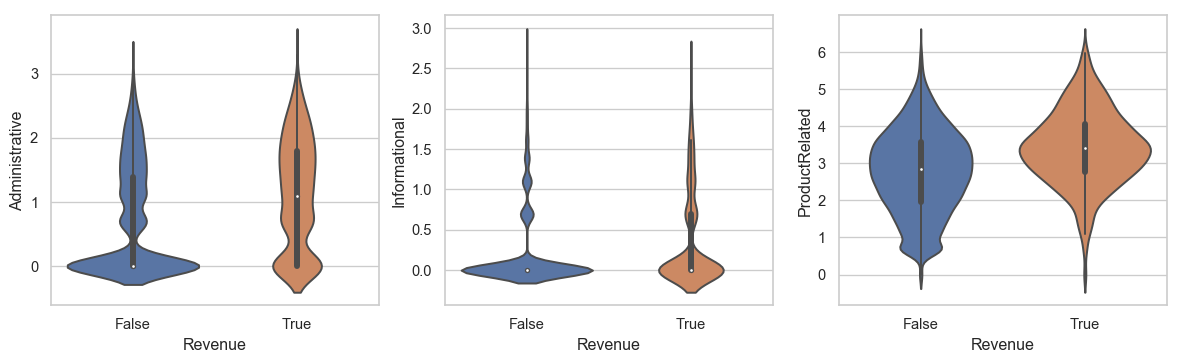

In [30]:
plt.figure(figsize=(15, 4), dpi=96)

plt.subplot(1,3,1)
create_plots(y_name="Administrative", data=df_trn, plt_type="violin", log=True)
plt.subplot(1,3,2)
create_plots(y_name="Informational", data=df_trn, plt_type="violin", log=True)
plt.subplot(1,3,3)
create_plots(y_name="ProductRelated", data=df_trn, plt_type="violin", log=True)

plt.show()

#### Percentages of webpages visited

In [31]:
page_count = df_trn[page_count_cols].groupby(df_trn.Revenue).mean()
page_count

,Administrative,Informational,ProductRelated
Revenue,,,
False,2.122014,0.446840,28.088986
True,3.373652,0.753467,48.791988


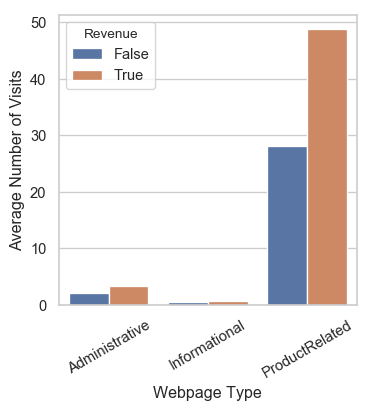

In [32]:
plt.figure(figsize=(4, 4), dpi=96)
page_count_plt = pd.melt(page_count.reset_index(), id_vars='Revenue',
                         var_name="Webpage Type", value_name="Average Number of Visits")
page_count_plt["Webpage Type"] = page_count_plt["Webpage Type"].astype(str).str.replace("_Duration", "")
sns.barplot(x="Webpage Type", y="Average Number of Visits", hue="Revenue", 
            data=page_count_plt)
plt.xticks(rotation=30)
plt.show()

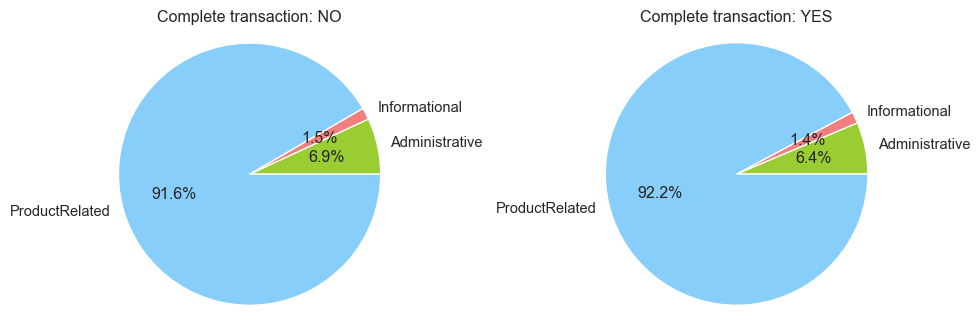

In [33]:
plt.figure(figsize=(12, 4), dpi=96)
                   
plt.subplot(1,2,1)
plt.pie(page_count.iloc[0,:], labels=page_count.columns,
        autopct='%1.1f%%', shadow=False, 
        colors=['yellowgreen', 'lightcoral', 'lightskyblue'])
plt.axis('equal')
plt.title('Complete transaction: NO')

plt.subplot(1,2,2)
plt.pie(page_count.iloc[1,:], labels=page_count.columns,
        autopct='%1.1f%%', shadow=False, 
        colors=['yellowgreen', 'lightcoral', 'lightskyblue'])
plt.axis('equal')
plt.title('Complete transaction: YES')

plt.show()

### [Numeric, float] Duration spent on each type of webpage

In [34]:
page_time_cols = ["Administrative_Duration","Informational_Duration","ProductRelated_Duration"]
df_trn[page_time_cols].describe()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration
count,8625.000000,8625.000000,8625.000000
mean,78.714701,33.128496,1158.022899
std,164.058904,134.712245,1668.650809
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,182.000000
50%,7.000000,0.000000,592.837500
75%,92.833333,0.000000,1437.750000
max,1951.279141,2256.916667,17550.584860


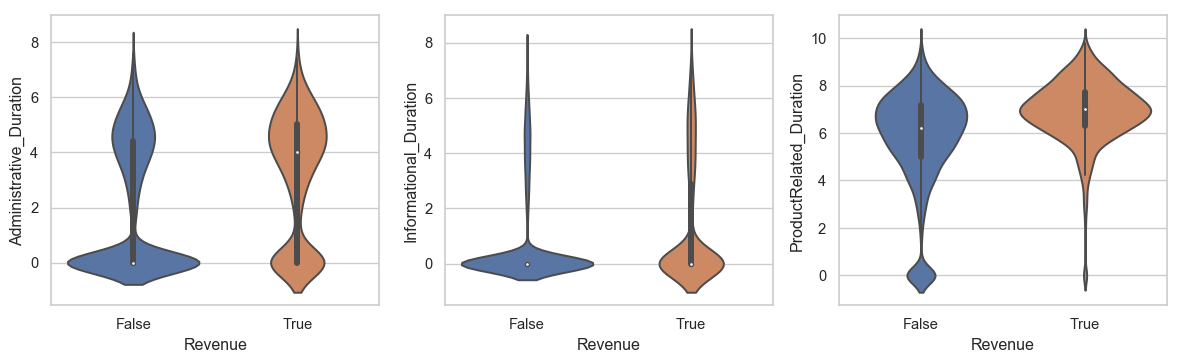

In [35]:
plt.figure(figsize=(15, 4), dpi=96)

plt.subplot(1,3,1)
create_plots(y_name="Administrative_Duration", data=df_trn, plt_type="violin", log=True)
plt.subplot(1,3,2)
create_plots(y_name="Informational_Duration", data=df_trn, plt_type="violin", log=True)
plt.subplot(1,3,3)
create_plots(y_name="ProductRelated_Duration", data=df_trn, plt_type="violin", log=True)

plt.show()

#### Percentages of time spent in two classes 

In [36]:
page_time = df_trn[page_time_cols].groupby(df_trn.Revenue).mean()
page_time

,Administrative_Duration,Informational_Duration,ProductRelated_Duration
Revenue,,,
False,71.887417,28.662441,1028.686817
True,117.253616,58.338654,1888.104153


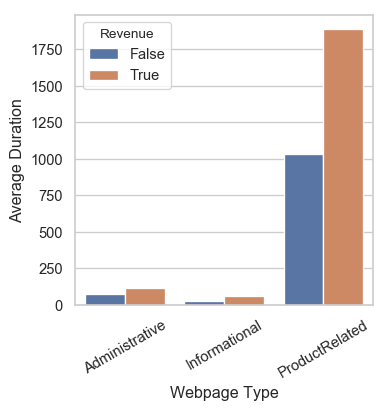

In [37]:
plt.figure(figsize=(4, 4), dpi=96)
page_time_plt = pd.melt(page_time.reset_index(), id_vars='Revenue',
                       var_name="Webpage Type", value_name="Average Duration")
page_time_plt["Webpage Type"] = page_time_plt["Webpage Type"].astype(str).str.replace("_Duration", "")
sns.barplot(x="Webpage Type", y="Average Duration", hue="Revenue", 
            data=page_time_plt)
plt.xticks(rotation=30)
plt.show()

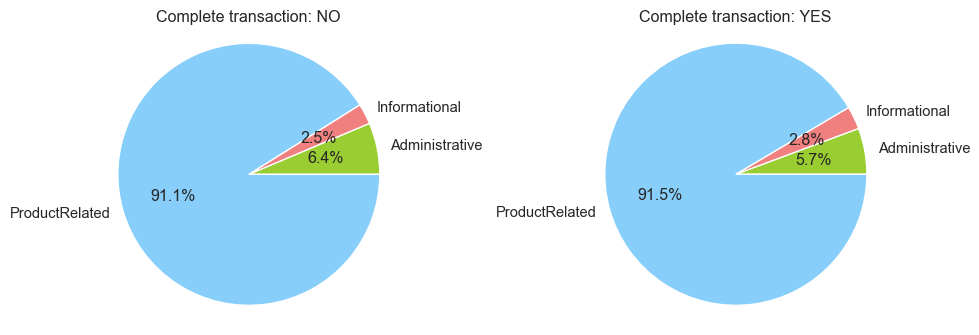

In [38]:
plt.figure(figsize=(12, 4), dpi=96)
                   
plt.subplot(1,2,1)
plt.pie(page_time.iloc[0,:], labels=page_time.columns.str.replace("_Duration",""),
        autopct='%1.1f%%', shadow=False, 
        colors=['yellowgreen', 'lightcoral', 'lightskyblue'])
plt.axis('equal')
plt.title('Complete transaction: NO')

plt.subplot(1,2,2)
plt.pie(page_time.iloc[1,:], labels=page_time.columns.str.replace("_Duration",""),
        autopct='%1.1f%%', shadow=False, 
        colors=['yellowgreen', 'lightcoral', 'lightskyblue'])
plt.axis('equal')
plt.title('Complete transaction: YES')

plt.show()

Summary:
+ It appears that on average, people who complete transactions visit more webpages, and spend more time on these webpages.
+ There doesn't seem to be a clear difference in the type of webpage visited between people who complete the purchase and those who don't.

### [Numeric] Google Analytics web metrics: Bounce Rates, Exit Rates, Page Values

In [39]:
ga_metrics = ["BounceRates", "ExitRates", "PageValues"]
df_trn[ga_metrics].describe()

,BounceRates,ExitRates,PageValues
count,8625.000000,8625.000000,8625.000000
mean,0.022265,0.043196,5.768381
std,0.048648,0.048660,18.221301
min,0.000000,0.000000,0.000000
25%,0.000000,0.014286,0.000000
50%,0.003077,0.025466,0.000000
75%,0.017143,0.050000,0.000000
max,0.200000,0.200000,361.763742


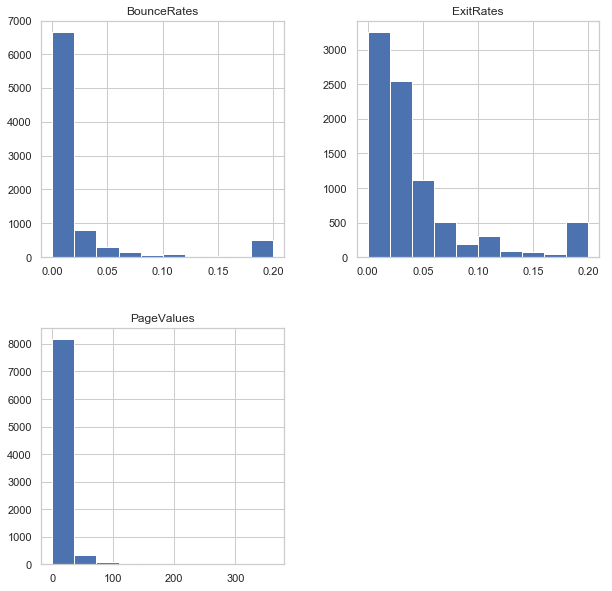

In [40]:
_ = df_trn[ga_metrics].hist(bins=10, figsize=(10,10))

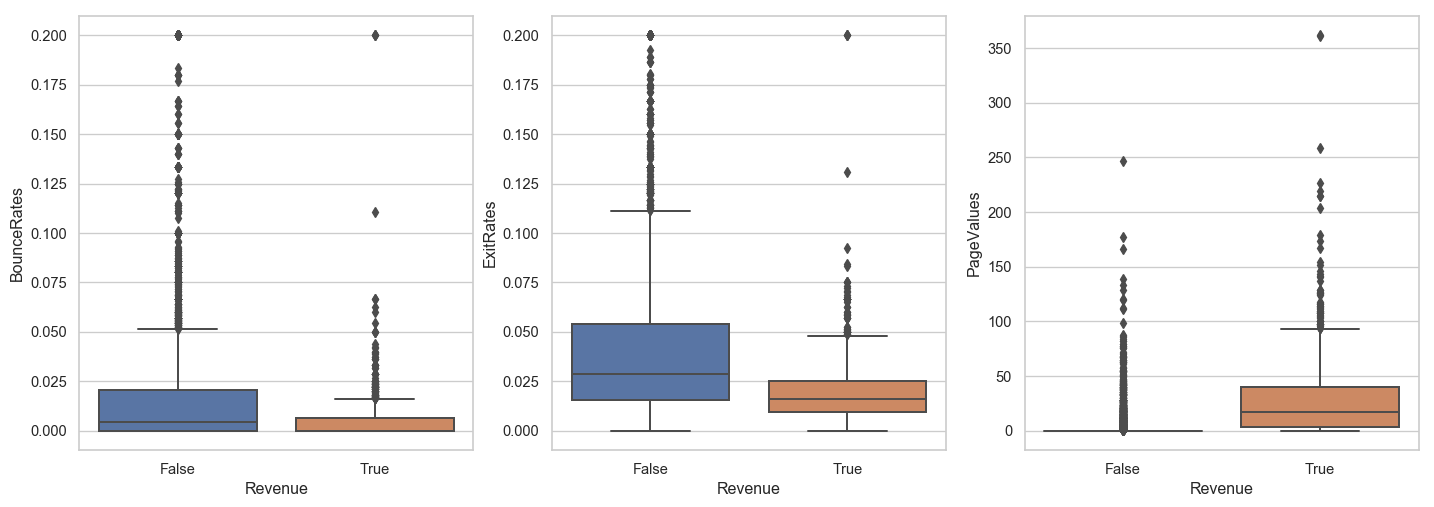

In [41]:
plt.figure(figsize=(18, 6), dpi=96)
plt.subplot(1,3,1)
create_plots(y_name="BounceRates", data=df_trn, plt_type="boxplot", log=False)
plt.subplot(1,3,2)
create_plots(y_name="ExitRates", data=df_trn, plt_type="boxplot", log=False)
plt.subplot(1,3,3)
create_plots(y_name="PageValues", data=df_trn, plt_type="boxplot", log=False)
plt.show()

#### One-way ANOVA comparing GA web metrics between class

In [42]:
br_fstat, br_pval = f_oneway(df_trn[df_trn.Revenue].BounceRates, df_trn[~df_trn.Revenue].BounceRates)
er_fstat, er_pval = f_oneway(df_trn[df_trn.Revenue].ExitRates, df_trn[~df_trn.Revenue].ExitRates)
pv_fstat, pv_pval = f_oneway(df_trn[df_trn.Revenue].PageValues, df_trn[~df_trn.Revenue].PageValues)
print(br_pval, er_pval, pv_pval)

4.009925473006529e-44 1.4109253450638892e-83 0.0


Summary: 
+ The three GA metrics are significantly difference in mean between classes, suggesting they may be important features for prediction

### [Numeric] Special Day

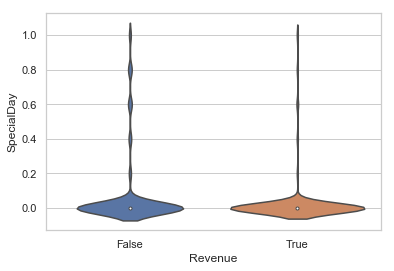

In [43]:
create_plots(y_name="SpecialDay", data=df_trn, plt_type="violin", log=False)

In [44]:
sd_fstat, sd_pval = f_oneway(df_trn[df_trn.Revenue].SpecialDay, df_trn[~df_trn.Revenue].SpecialDay)
sd_pval

2.2391630467112616e-14

In [45]:
print(df_trn[df_trn.Revenue].SpecialDay.mean())
print(df_trn[~df_trn.Revenue].SpecialDay.mean())

0.023882896764252697
0.07036986488330832


### [Categorical] Visit session info: OperatingSystems, Browser, TrafficType

In [46]:
def create_piechart(y_name, data):
    freq_tb = data[y_name].groupby(data.Revenue).value_counts()
    print(freq_tb)
    freq_tb = freq_tb.unstack(level='Revenue').fillna(0).transpose()
    print(freq_tb)
    
    plt.figure(figsize=(12, 4), dpi=96)
                   
    plt.subplot(1,2,1)
    plt.pie(freq_tb.iloc[0,:], labels=freq_tb.columns,
            autopct='%1.1f%%', shadow=False)#, 
            #colors=['yellowgreen', 'lightcoral', 'lightskyblue'])
    plt.axis('equal')
    plt.title('Complete transaction: NO')

    plt.subplot(1,2,2)
    plt.pie(freq_tb.iloc[1,:], labels=freq_tb.columns,
            autopct='%1.1f%%', shadow=False)#, 
            #colors=['yellowgreen', 'lightcoral', 'lightskyblue'])
    plt.axis('equal')
    plt.title('Complete transaction: YES')

Revenue  OperatingSystems
False    2                   3779
         3                   1632
         1                   1570
         4                    280
         8                     42
         6                     14
         5                      5
         7                      5
True     2                    780
         1                    257
         3                    185
         4                     57
         8                     16
         6                      2
         7                      1
Name: OperatingSystems, dtype: int64
OperatingSystems       1       2       3      4    5     6    7     8
Revenue                                                              
False             1570.0  3779.0  1632.0  280.0  5.0  14.0  5.0  42.0
True               257.0   780.0   185.0   57.0  0.0   2.0  1.0  16.0


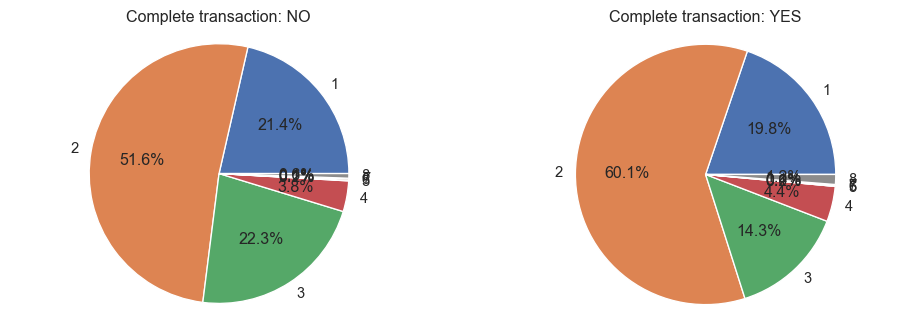

In [47]:
create_piechart("OperatingSystems", df_trn)

Revenue  Browser
False    2          4705
         1          1501
         4           413
         5           285
         6           106
         10           92
         8            85
         3            70
         7            29
         13           29
         12            6
         11            5
         9             1
True     2           848
         1           252
         4            76
         5            54
         10           18
         13           16
         8            13
         6            11
         7             5
         3             3
         12            2
Name: Browser, dtype: int64
Browser      1       2     3      4      5      6     7     8    9     10  \
Revenue                                                                     
False    1501.0  4705.0  70.0  413.0  285.0  106.0  29.0  85.0  1.0  92.0   
True      252.0   848.0   3.0   76.0   54.0   11.0   5.0  13.0  0.0  18.0   

Browser   11   12    13  
Revenue             

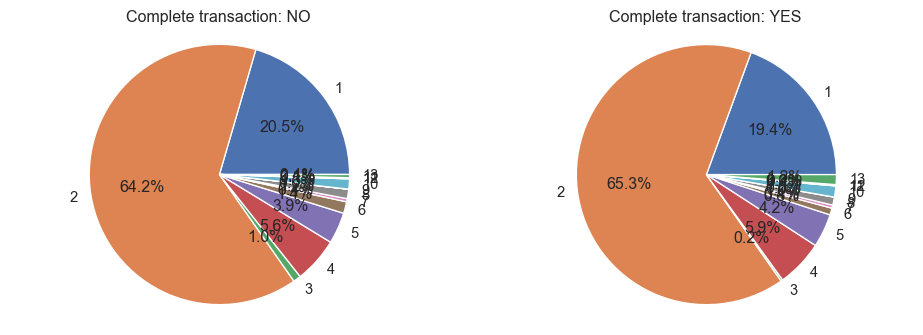

In [48]:
create_piechart("Browser", df_trn)

Revenue  TrafficType
False    2              2178
         1              1516
         3              1303
         4               630
         13              495
         6               279
         10              259
         8               181
         5               142
         11              138
         20               98
         9                32
         15               28
         7                22
         14                8
         19                8
         18                7
         16                2
         12                1
True     2               587
         1               181
         3               123
         4               107
         10               62
         8                58
         5                37
         20               37
         6                35
         11               31
         13               28
         7                 9
         9                 1
         14                1
         16           

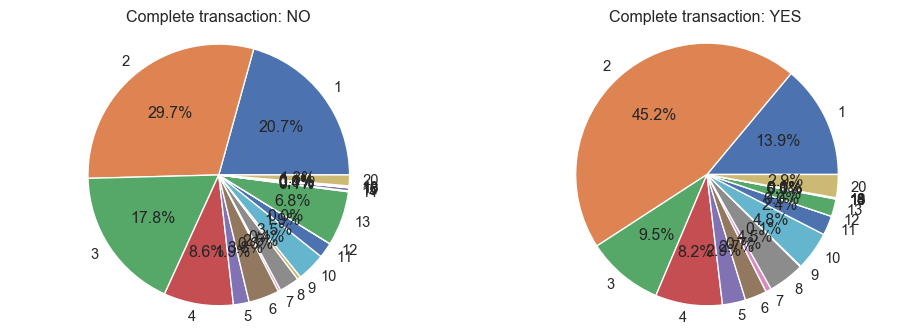

In [49]:
create_piechart("TrafficType", df_trn)

### [Categorical] Demographics of visitors: VisitorType, Region

Revenue  VisitorType      
False    Returning_Visitor    6374
         New_Visitor           906
         Other                  47
True     Returning_Visitor     986
         New_Visitor           296
         Other                  16
Name: VisitorType, dtype: int64
VisitorType  New_Visitor  Other  Returning_Visitor
Revenue                                           
False                906     47               6374
True                 296     16                986


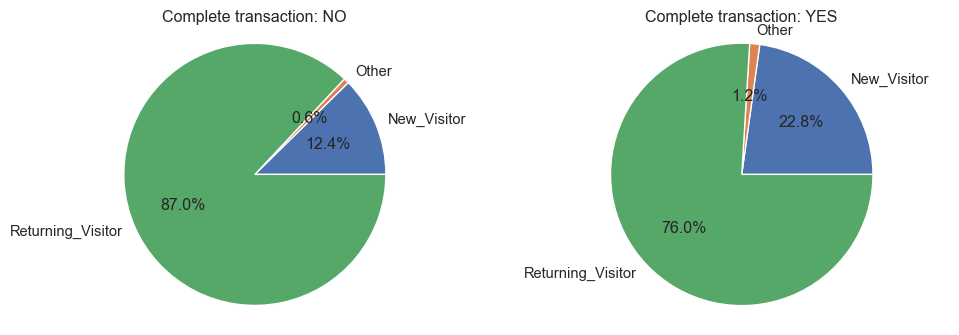

In [50]:
create_piechart("VisitorType", df_trn)

Summary:
+ New visitors take up a larger percentage in those who complete transaction, while there are more returning visitors among those who do not complete the purchase.

Revenue  Region
False    1         2829
         3         1434
         4          712
         2          649
         6          496
         7          452
         9          302
         8          262
         5          191
True     1          530
         3          221
         2          133
         4          125
         6           71
         7           71
         9           66
         5           42
         8           39
Name: Region, dtype: int64
Region      1    2     3    4    5    6    7    8    9
Revenue                                               
False    2829  649  1434  712  191  496  452  262  302
True      530  133   221  125   42   71   71   39   66


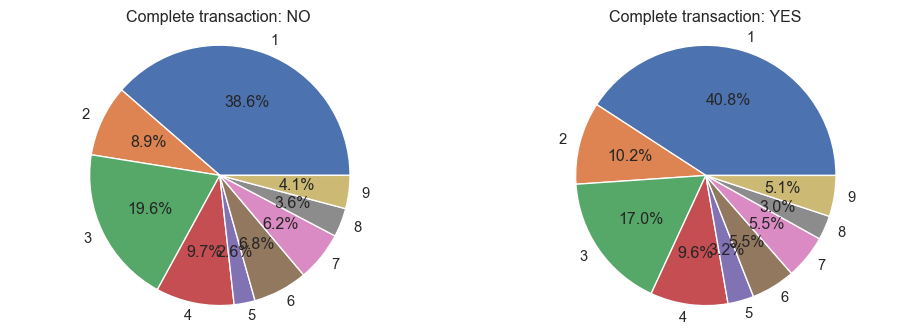

In [51]:
create_piechart("Region", df_trn)

### [Categorical] Time: Weekend, Month

Revenue  Weekend
False    False      5646
         True       1681
True     False       958
         True        340
Name: Weekend, dtype: int64
Weekend  False  True 
Revenue              
False     5646   1681
True       958    340


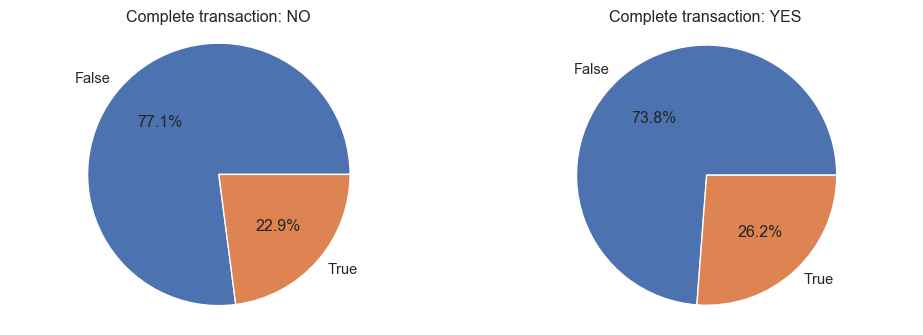

In [52]:
create_piechart("Weekend", df_trn)

Revenue  Month
False    May      2110
         Nov      1560
         Mar      1207
         Dec      1079
         Oct       305
         Aug       256
         Sep       253
         Jul       245
         June      177
         Feb       135
True     Nov       525
         May       246
         Dec       149
         Mar       121
         Oct        76
         Sep        59
         Aug        50
         Jul        50
         June       20
         Feb         2
Name: Month, dtype: int64
Month    Aug   Dec  Feb  Jul  June   Mar   May   Nov  Oct  Sep
Revenue                                                       
False    256  1079  135  245   177  1207  2110  1560  305  253
True      50   149    2   50    20   121   246   525   76   59


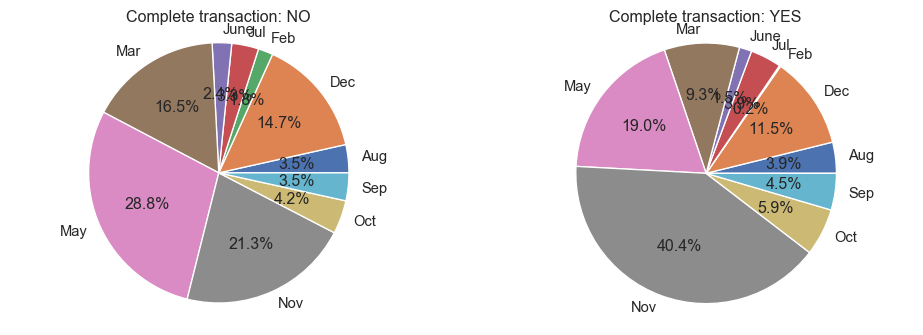

In [53]:
create_piechart("Month", df_trn)

Summary:
+ In novermber, more visitors tend to complete the purchase - for holiday seasons?

# Save data object

In [54]:
df_trn.to_pickle("trn.pkl")
df_tst.to_pickle("tst.pkl")

# Building Classifiers

## Feature engineering and representations

In [55]:
print(df_trn.shape)
print(df_tst.shape)

(8625, 18)
(3699, 18)


In [56]:
## create one-hot vectors for categorical variables
onehot = OneHotEncoder()

# combine train and test to convert categorical variables
df_trn['isTrain'] = True
df_tst['isTrain'] = False
df_concat = pd.concat([df_trn, df_tst], axis=0)
print(df_concat.shape)
df_concat.head()

(12324, 19)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,isTrain
2476,5,626.000000,1,66.0,77,2660.150000,0.0,0.008228,41.925190,0.0,May,1,1,3,2,Returning_Visitor,False,False,True
582,1,43.000000,0,0.0,37,1505.166667,0.0,0.005263,0.000000,0.0,Mar,2,2,4,8,New_Visitor,False,False,True
10029,0,0.000000,0,0.0,9,258.291667,0.0,0.022222,0.000000,0.0,Nov,2,5,3,2,Returning_Visitor,False,False,True
1154,0,0.000000,0,0.0,1,0.000000,0.2,0.200000,0.000000,0.0,Mar,1,1,1,9,Returning_Visitor,True,False,True
1579,11,348.654762,1,11.0,64,1229.289286,0.0,0.002494,54.951269,0.0,Mar,2,2,1,2,New_Visitor,False,False,True


In [57]:
df_concat_category = onehot.fit_transform(df_concat[cat_vars]).toarray()
df_concat_category = pd.DataFrame(df_concat_category)
print(df_concat_category.shape)
df_concat_category.head()

(12324, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [58]:
all(df_concat_category.isnull().sum()==0)

True

In [59]:
df_concat_category.index = df_concat.index

In [60]:
df_concat_merged = pd.concat([df_concat[num_vars], df_concat[['isTrain', 'Revenue']],
                              df_concat_category], axis=1)
print(df_concat_merged.shape)
df_concat_merged.head()

(12324, 77)


,ExitRates,ProductRelated,Informational,Administrative_Duration,PageValues,Administrative,SpecialDay,BounceRates,Informational_Duration,ProductRelated_Duration,...,55,56,57,58,59,60,61,62,63,64
2476,0.008228,77,1,626.000000,41.925190,5,0.0,0.0,66.0,2660.150000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
582,0.005263,37,0,43.000000,0.000000,1,0.0,0.0,0.0,1505.166667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10029,0.022222,9,0,0.000000,0.000000,0,0.0,0.0,0.0,258.291667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1154,0.200000,1,0,0.000000,0.000000,0,0.0,0.2,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1579,0.002494,64,1,348.654762,54.951269,11,0.0,0.0,11.0,1229.289286,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [61]:
all(df_concat_merged.isnull().sum()==0)

True

In [62]:
df_trn_trans = df_concat_merged[df_concat_merged.isTrain]
df_tst_trans = df_concat_merged[~df_concat_merged.isTrain]
df_trn_trans.drop('isTrain', inplace=True, axis=1)
df_tst_trans.drop('isTrain', inplace=True, axis=1)
print(df_trn_trans.shape)
print(df_tst_trans.shape)
#df_trn_trans.columns

(8625, 76)
(3699, 76)


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Further split training set into 80% train & 20% validation

In [63]:
df_trn_trans, df_val_trans = train_test_split(df_trn_trans, test_size=0.2, random_state=123)

print(df_trn_trans.shape)
print(df_val_trans.shape)

(6900, 76)
(1725, 76)


In [64]:
print(df_trn_trans.drop('Revenue', axis=1).shape)
print(df_trn_trans.shape)

(6900, 75)
(6900, 76)


In [65]:
trn_X = df_trn_trans.drop('Revenue', axis=1)
val_X = df_val_trans.drop('Revenue', axis=1)
tst_X = df_tst_trans.drop('Revenue', axis=1)

trn_y = df_trn_trans.Revenue
val_y = df_val_trans.Revenue
tst_y = df_tst_trans.Revenue

print(trn_X.shape); print(trn_y.shape)
print(val_X.shape); print(val_y.shape)
print(tst_X.shape); print(tst_y.shape)

(6900, 75)
(6900,)
(1725, 75)
(1725,)
(3699, 75)
(3699,)


## PCA on all variables (after one-hot encoding)

75


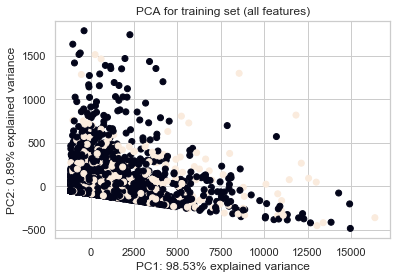

In [66]:
pca = PCA()
pca.fit(trn_X)
print(pca.n_components_)

trn_pca_whole = pca.transform(trn_X)
plt.scatter(trn_pca_whole[:,0], trn_pca_whole[:,1], c=trn_y)
plt.title('PCA for training set (all features)')
plt.xlabel('PC1: ' + str(round(pca.explained_variance_ratio_[0]*100,2)) + '% explained variance')
plt.ylabel('PC2: ' + str(round(pca.explained_variance_ratio_[1]*100,2)) + '% explained variance')
plt.show()

## Normalize features

In [67]:
zscore = StandardScaler()
trn_X = zscore.fit(trn_X).transform(trn_X)
val_X = zscore.fit(val_X).transform(val_X)
tst_X = zscore.fit(tst_X).transform(tst_X)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were 

## K nearest neighbors (KNN)

In [68]:
knn_auc_trn = []
knn_auc_val = []

k_seq = range(1, 31)
for k in k_seq:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trn_X, trn_y)
    
    knn_pred_trn = knn.predict(trn_X)
    knn_pred_val = knn.predict(val_X)
    
    knn_auc_trn.append(roc_auc_score(trn_y, knn_pred_trn))
    knn_auc_val.append(roc_auc_score(val_y, knn_pred_val))

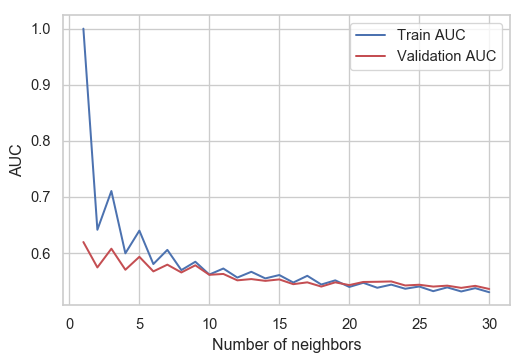

In [69]:
plt.figure(figsize=(6, 4), dpi=96)
plt.plot(list(k_seq), knn_auc_trn, 'b', label='Train AUC')
plt.plot(list(k_seq), knn_auc_val, 'r', label='Validation AUC')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('AUC')
plt.show()

In [70]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trn_X, trn_y)
    
knn_pred_trn = knn.predict(trn_X)
knn_pred_val = knn.predict(val_X)
knn_pred_tst = knn.predict(tst_X)
    
print("Train AUC: %0.2f" % roc_auc_score(trn_y, knn_pred_trn))
print("Validation AUC: %0.2f" % roc_auc_score(val_y, knn_pred_val))
print("Test AUC: %0.2f" % roc_auc_score(tst_y, knn_pred_tst))

Train AUC: 0.64
Validation AUC: 0.59
Test AUC: 0.58


## Logistic regression

In [93]:
logit_auc_trn = []
logit_auc_val = []

C_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1e5, 1e6, 1e7]

for c in C_range:
    
    logit = LogisticRegression(penalty='l2', C=c, solver='lbfgs', random_state=123)
    logit.fit(trn_X, trn_y)
    
    logit_pred_trn = logit.predict(trn_X)
    logit_pred_val = logit.predict(val_X)
    
    logit_auc_trn.append(roc_auc_score(trn_y, logit_pred_trn))
    logit_auc_val.append(roc_auc_score(val_y, logit_pred_val))

In [94]:
[1/c for c in C_range]

[10000.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 1e-05, 1e-06, 1e-07]

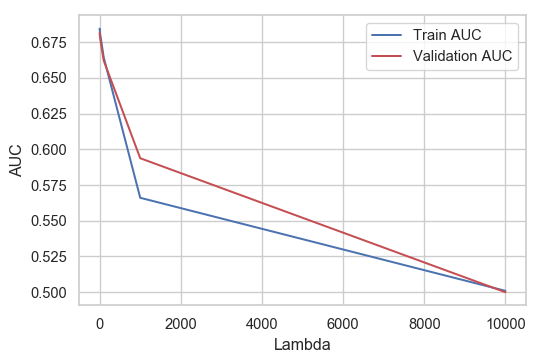

In [98]:
plt.figure(figsize=(6, 4), dpi=96)
plt.plot([1.0/c for c in C_range], logit_auc_trn, 'b', label='Train AUC')
plt.plot([1.0/c for c in C_range], logit_auc_val, 'r', label='Validation AUC')
plt.legend()
plt.xlabel('Lambda')
plt.ylabel('AUC')
#plt.xlim(0,5000)
plt.show()

In [99]:
logit = LogisticRegression(solver = 'lbfgs', max_iter=10000, C=1e7)
logit.fit(trn_X, trn_y)

logit_pred_trn = logit.predict(trn_X)
logit_pred_val = logit.predict(val_X)
logit_pred_tst = logit.predict(tst_X)

print("Train AUC: %0.2f" % roc_auc_score(trn_y, logit_pred_trn))
print("Validation AUC: %0.2f" % roc_auc_score(val_y, logit_pred_val))
print("Test AUC: %0.2f" % roc_auc_score(tst_y, logit_pred_tst))

Train AUC: 0.68
Validation AUC: 0.68
Test AUC: 0.66


## Random Forest

In [109]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [110]:
rf_base = RandomForestClassifier()
rf = RandomizedSearchCV(estimator=rf_base, param_distributions=random_grid, n_iter=100, cv=10, 
                        verbose=2, random_state=123, n_jobs=8)
rf.fit(trn_X, trn_y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   46.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.5min
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:  8.5min
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed: 16.9min
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed: 28.0min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=8,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [111]:
rf.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 91}

In [112]:
rf_pred_trn = rf.predict(trn_X)
rf_pred_val = rf.predict(val_X)
rf_pred_tst = rf.predict(tst_X)
    
print("Train AUC: %0.2f" % roc_auc_score(trn_y, rf_pred_trn))
print("Validation AUC: %0.2f" % roc_auc_score(val_y, rf_pred_val))
print("Test AUC: %0.2f" % roc_auc_score(tst_y, rf_pred_tst))

Train AUC: 0.91
Validation AUC: 0.73
Test AUC: 0.73
